# Setup

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn')

In [2]:
def plot_heatmap_totals(run_folder: str, state: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)

    df = pd.DataFrame(columns=['R', 'Rho', 'Value'])
    
    for filename in os.listdir(run_folder_path):
        filename_path = os.path.join(run_folder_path, filename)

        match = re.match(r'r=(\d+\.\d+)_rho=(\d+\.\d+)', filename)
        
        if match is None:
            continue
        
        r = float(match.groups(0)[0])
        rho = float(match.groups(0)[1])
        
        if r + rho > 1:
            continue
        
        totals_df = pd.read_csv(os.path.join(filename_path, 'totals.csv'))
        value = totals_df.iloc[-1][state]
        
        row = {'R': r, 'Rho': rho, 'Value': value}
        
        new_df = pd.DataFrame([row])
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
        
    result = df.pivot(index='R', columns='Rho', values='Value')
    ax = sns.heatmap(result, annot=True, cmap=sns.color_palette("Blues", as_cmap=True))
    ax.invert_yaxis()
    
    plt.title('Total ' + state)

    plt.show()

In [3]:
def plot_heatmap_flatness(run_folder: str, func):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    
    df = pd.DataFrame(columns=['R', 'Rho', 'Value'])
    
    for filename in os.listdir(run_folder_path):
        filename_path = os.path.join(run_folder_path, filename)
        
        match = re.match(r'r=(\d+\.\d+)_rho=(\d+\.\d+)', filename)
        
        if match is None:
            continue
        
        r = float(match.groups(0)[0])
        rho = float(match.groups(0)[1])
        
        if r + rho > 1:
            continue
        
        states_df = pd.read_csv(os.path.join(filename_path, 'states.csv'))
        value = func(states_df['Hospitalised'])
        
        new_df = pd.DataFrame([{'R': r, 'Rho': rho, 'Value': value}])
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
        
    result = df.pivot(index='R', columns='Rho', values='Value')
    ax = sns.heatmap(result, annot=True, cmap=sns.color_palette("Blues", as_cmap=True))
    
    plt.gca().invert_yaxis()
    
    plt.title('Flatness: ' + func.__name__)
    
    plt.show()

# Results

## State Totals

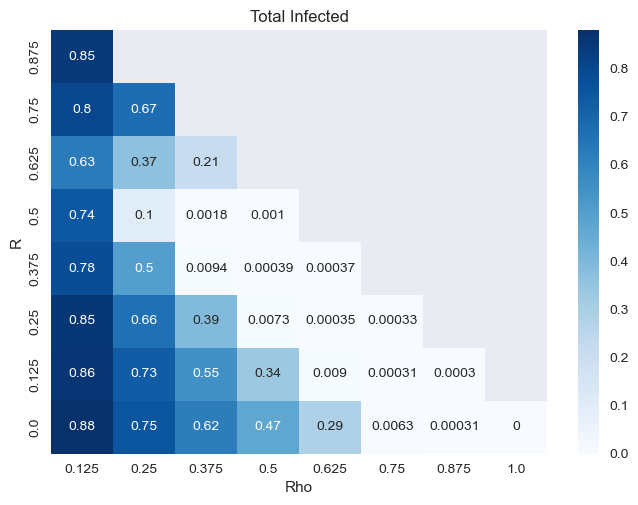

In [4]:
plot_heatmap_totals(run_folder='heatmap', state='Infected')

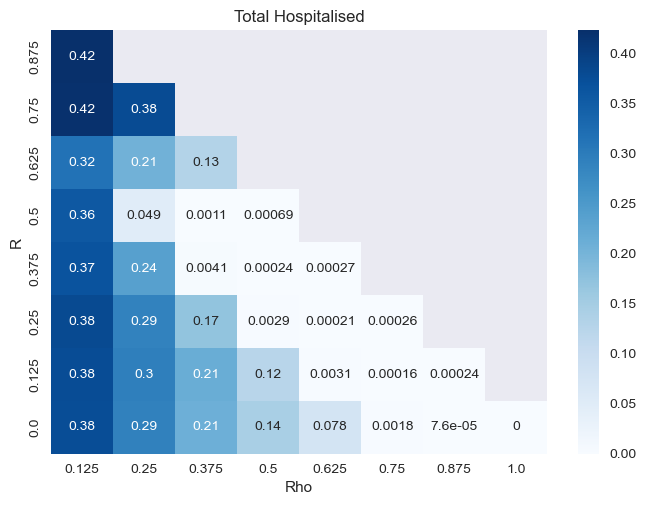

In [5]:
plot_heatmap_totals(run_folder='heatmap', state='Hospitalised')

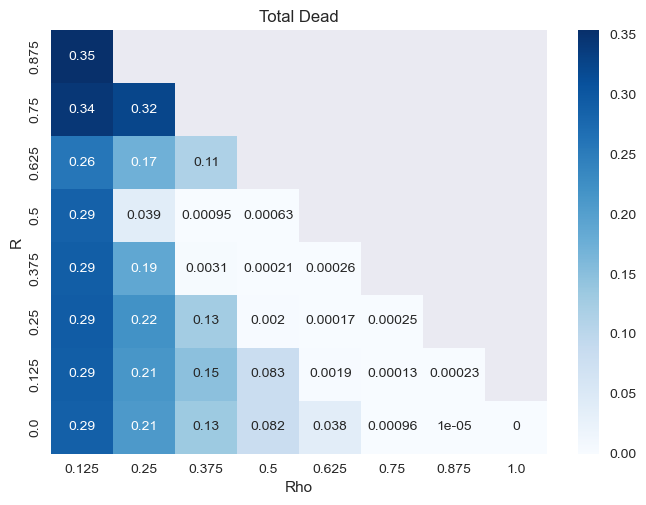

In [6]:
plot_heatmap_totals(run_folder='heatmap', state='Dead')

## Flatness

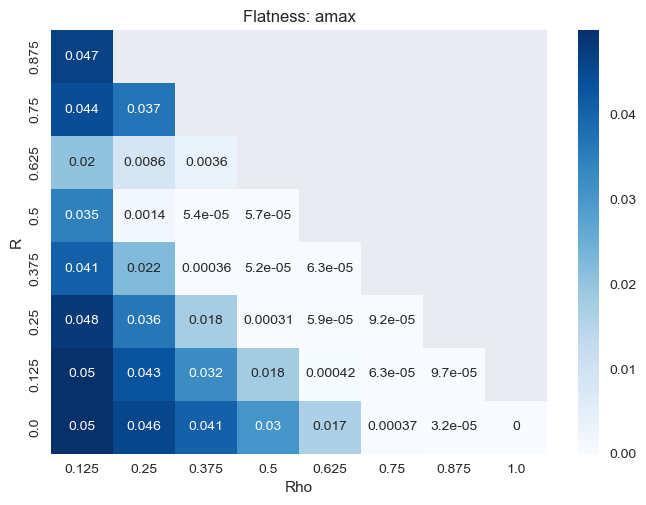

In [7]:
plot_heatmap_flatness(run_folder='heatmap', func=np.max)

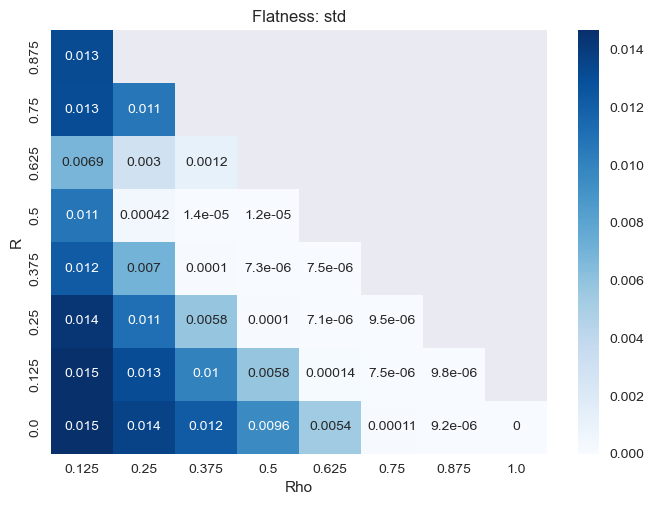

In [8]:
plot_heatmap_flatness(run_folder='heatmap', func=np.std)